### Ruby en Rails avanzado

#### Vistas parciales, validaciones y filtros

Añadimos el código proporsionado en la actividad al modelo Movie para establecer validaciones, que esta en app/models/movie.rb  

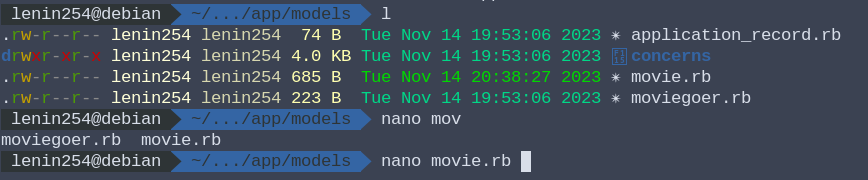  
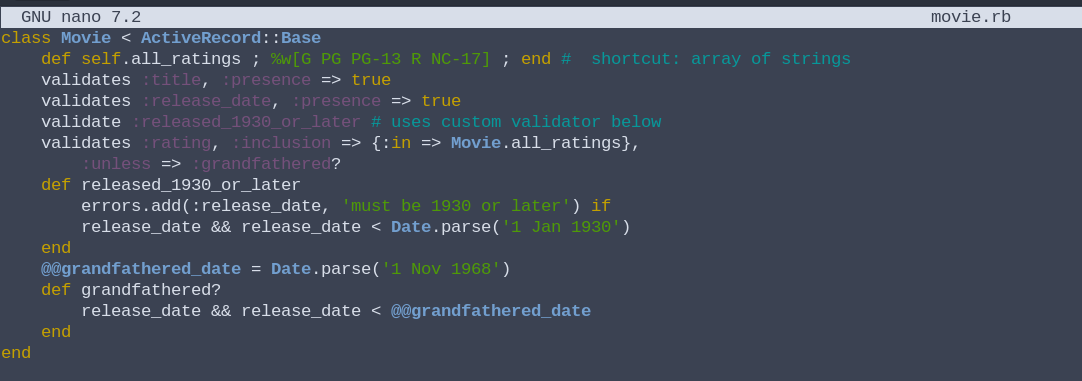  
Ahora comprobamos en la consola:  
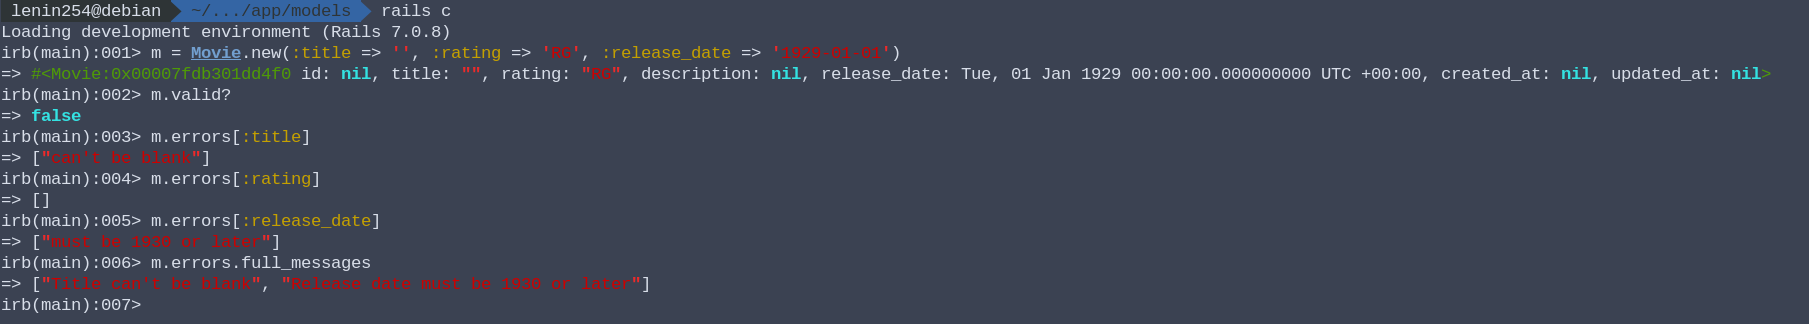  


## Explica el siguiente codigo:  

```ruby
class MoviesController < ApplicationController
  def new
    @movie = Movie.new
  end 
  def create
    if (@movie = Movie.create(movie_params))
      redirect_to movies_path, :notice => "#{@movie.title} created."
    else
      flash[:alert] = "Movie #{@movie.title} could not be created: " +
        @movie.errors.full_messages.join(",")
      render 'new'
    end
  end
  def edit
    @movie = Movie.find params[:id]
  end
  def update
    @movie = Movie.find params[:id]
    if (@movie.update_attributes(movie_params))
      redirect_to movie_path(@movie), :notice => "#{@movie.title} updated."
    else
      flash[:alert] = "#{@movie.title} could not be updated: " +
        @movie.errors.full_messages.join(",")
      render 'edit'
    end
  end
  def destroy
    @movie = Movie.find(params[:id])
    @movie.destroy
    redirect_to movies_path, :notice => "#{@movie.title} deleted."
  end
  private
  def movie_params
    params.require(:movie)
    params[:movie].permit(:title,:rating,:release_date)
  end
end
```

**RPT:**  
El codigo muestra el contorlador MoviesController de Rails, esta usando las operaciones CRUD (Crear, Leer, Actualizar, Eliminar) para Movie.  
Métodos: 
1. **new:** Creaa la instancia Movie y la asigna a la variable @movie
2. **create:** Esta tiene dos casos, si la creacion tiene exito redirige a la pagina indice (movies_path)y muestra una notificacion. En el caso que no tenga exito, establece un mensaje de alerta, guarda el error y vuelve a rederizar 'new'
3. **edit:** Aqui encuentra la instancia movie corrspondiente al ID proporcionado y la asigna a la variable @movie
4. **update:** Aqui tambien hay dos casos, Si la actualizacion tiene exito redirige a la pagina de detalles de la pelicula y mmuestra un mensaje de notificacion, pero si hay errores en la actualizacion, establece un mensaje de alerta, guarda los errores y vuelve a rederizar el formulario de edicion 
5. **destroy:** Esta encuentra la intancia Movie correspondiente al ID dado, la destruye y redirige a la pagina de indice (movies_path) con un mensaje de notificacion
6. **movie_params:** Esto se usa para filtrar y permitir solo parametros especificos 

## Comprueba  
El código siguiente ilustra cómo utilizar este mecanismo para “canonicalizar” (estandarizar el formato de) ciertos campos del modelo antes de guardar el modelo. 

```ruby
class Movie < ActiveRecord::Base
    before_save :capitalize_title
    def capitalize_title
        self.title = self.title.split(/\s+/).map(&:downcase).
        map(&:capitalize).join(' ')
    end
end
```

**RPT:**  
El código asegura que, antes de guardar una película en la base de datos, su título se formatee correctamente con la primera letra de cada palabra en mayúscula y las demás letras en minúscula.

## Comprueba en la consola :
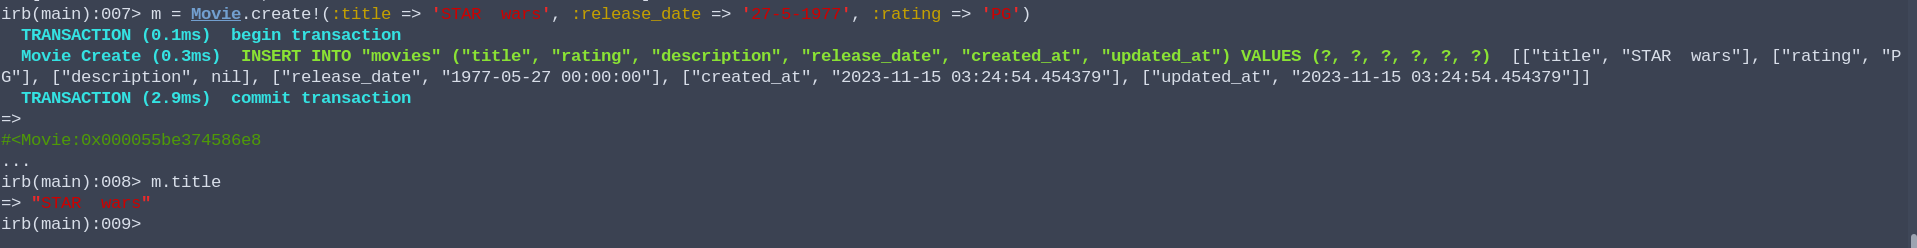

# SSO y autenticación a través de terceros 

**Crear modelo y migración:**  
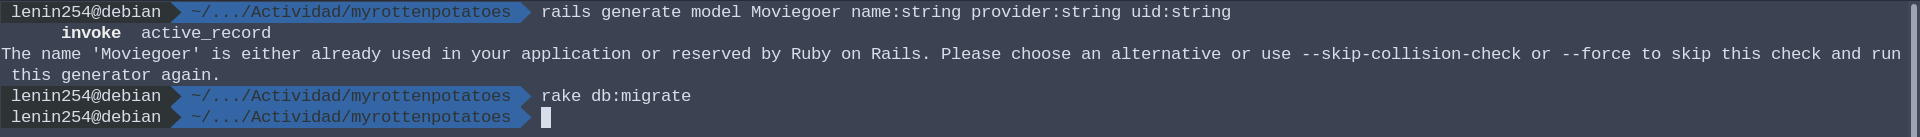  
**Editar el modelo Moviegoer:**  
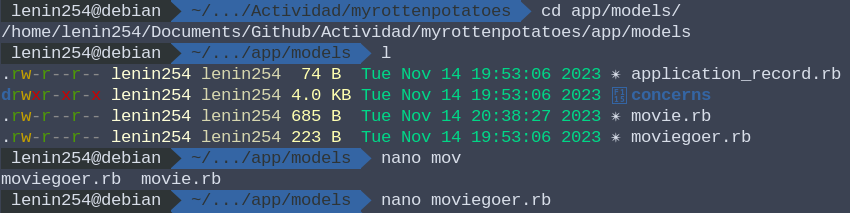  
Lo editamos de la siguiente manera  
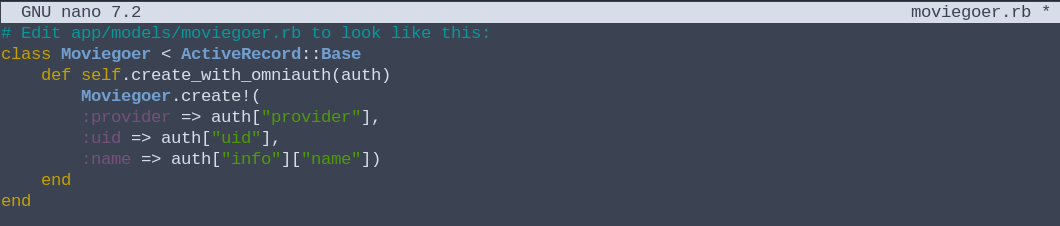  

Pregunta: Debes tener cuidado para evitar crear una vulnerabilidad de seguridad. ¿Qué sucede si un atacante malintencionado crea un envío de formulario que intenta modificar params[:moviegoer][:uid] o params[:moviegoer][:provider] (campos que solo deben modificarse mediante la lógica de autenticación) publicando campos de formulario ocultos denominados params[moviegoer][uid] y así sucesivamente?.  
**RPT:**  
Para evitar eso pordemos utilizar Strong Parameters en el controlador para permitir solo los atributos necesarios.Tambien podemos validar en el modelo para asegurar que ciertos atributos no se modifiquen en ciertos contextos, usando el método `attr_readonly` o validaciones personalizadas.


## Asociaciones y claves foráneas
Explica la siguientes líneas de SQL:

```
SELECT reviews.*
    FROM movies JOIN reviews ON movies.id=reviews.movie_id
    WHERE movies.id = 41;
```
**RPT:**  
Esta consulta selecciona todas las columnas de la tabla `reviews` para las revisiones asociadas a la película con `id` 41 en la tabla `movies`.


**Crear la migración para la tabla Reviews:**  
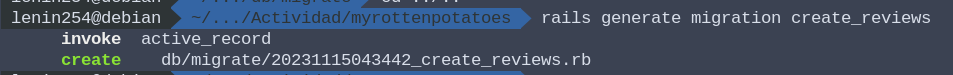  
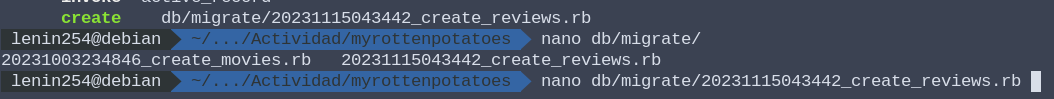  
editamos el archivo de esta manera:
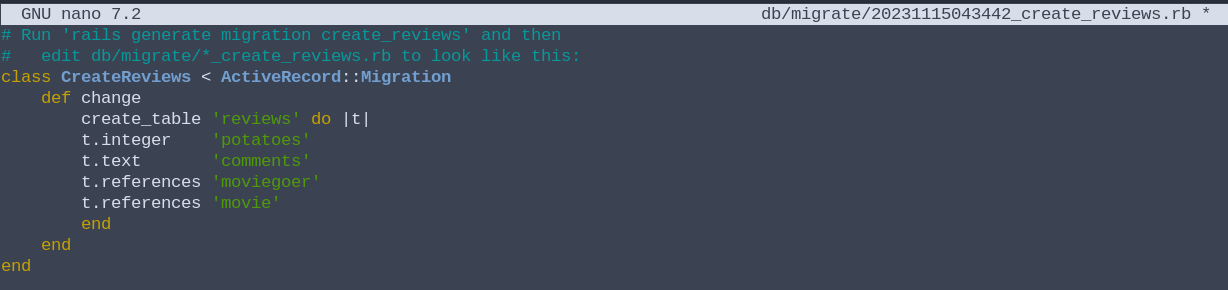  
**Crea el modelo de revisión (Review):**
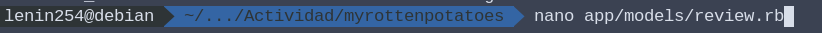  
Agregamos lo que dice la actividad  
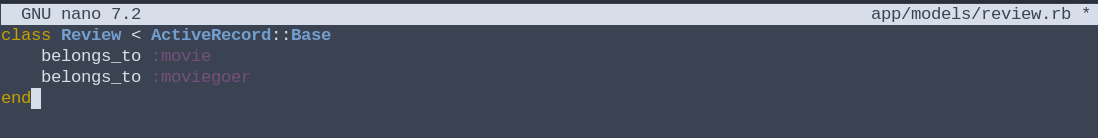  
**Agrega la asociación a las clases Movie y Moviegoer:**  
En movie.rb:  
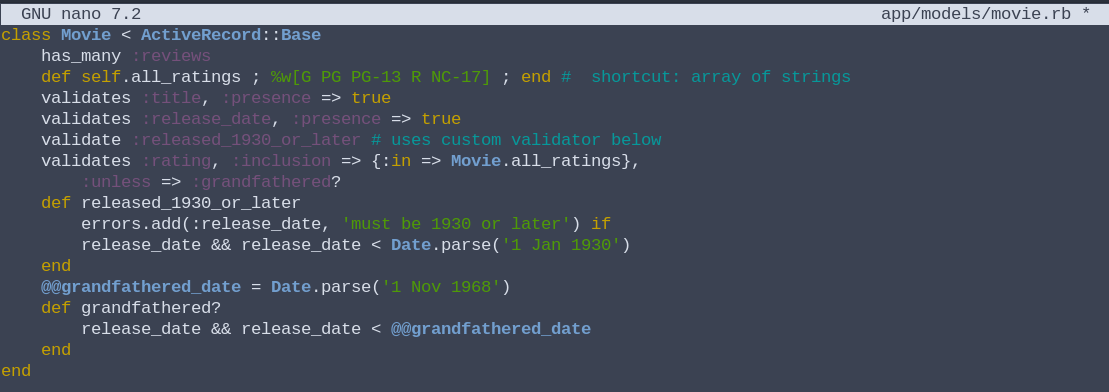  
En moviegoer:  
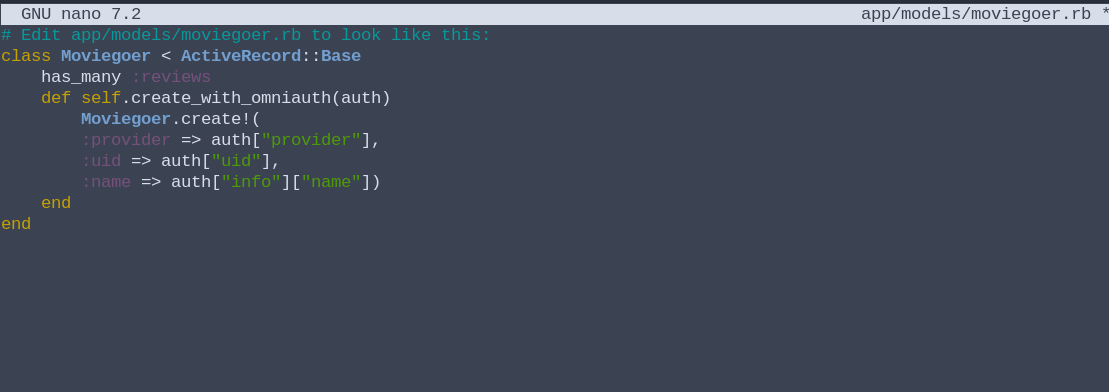  



#### Asociaciones indirectas
¿Qué indica el siguiente código SQL ?

```
SELECT movies .*
    FROM movies JOIN reviews ON movies.id = reviews.movie_id
    JOIN moviegoers ON moviegoers.id = reviews.moviegoer_id
    WHERE moviegoers.id = 1;
```

**RPT:**  
La consulta selecciona todas las columnas de la tabla `movies` para las películas revisadas por el `moviegoer` con `id` 1, mediante las tablas intermedias `reviews` y `moviegoers`.  

**Coloca el nuevo modelo de Review en app/models/review.rb con la siguiente estructura:**  
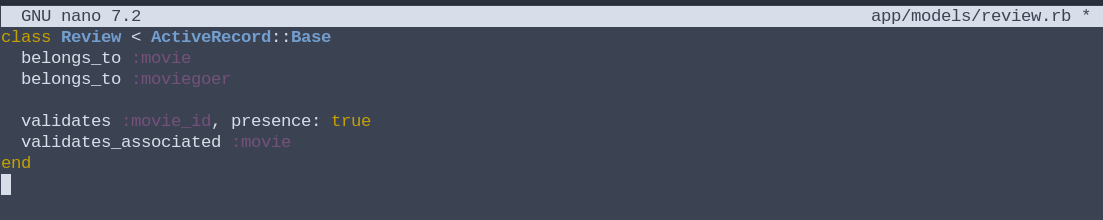  
